In [1]:
import numpy as np
import pandas as pd
from models import CaviarModel
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('../SPY.xlsx')
df.columns = df.iloc[5].values
df = df.iloc[6:].iloc[::-1].reset_index(drop=True)
df['Log Return'] = df.PX_LAST.apply(lambda x: np.log(x)).diff()
df.head()

,Date,PX_LAST,Change,% Change,PX_OPEN,Change,% Change,PX_HIGH,Change,% Change,PX_LOW,Change,% Change,Log Return
0,1993-01-29 00:00:00,25.2238,NaN,NaN,25.2417,NaN,NaN,25.2417,NaN,NaN,25.1161,NaN,NaN,NaN
1,1993-02-01 00:00:00,25.4032,NaN,NaN,25.2417,NaN,NaN,25.4032,NaN,NaN,25.2417,NaN,NaN,0.007087
2,1993-02-02 00:00:00,25.457,NaN,NaN,25.3852,NaN,NaN,25.4749,NaN,NaN,25.3314,NaN,NaN,0.002116
3,1993-02-03 00:00:00,25.7261,NaN,NaN,25.4929,NaN,NaN,25.744,NaN,NaN,25.4749,NaN,NaN,0.010515
4,1993-02-04 00:00:00,25.8337,NaN,NaN,25.8158,NaN,NaN,25.8876,NaN,NaN,25.762,NaN,NaN,0.004174


In [3]:
log_ret_100x = 100 * (df['Log Return'].dropna() - df['Log Return'].dropna().mean()).reset_index(drop=True)

In [21]:
mod = CaviarModel(quantile=0.99)

In [22]:
res = mod.fit(log_ret_100x)

In [23]:
res

      fun: -19465.420250554867
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([-18.81671778, 146.61964085, 536.11765637, 203.05451482,
       636.36361709])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 546
      nit: 37
     njev: 91
   status: 0
  success: True
        x: array([ 0.02796208,  0.03282907,  0.87540598,  0.33791916, -1.        ])

In [24]:
betas = res.x[1:]

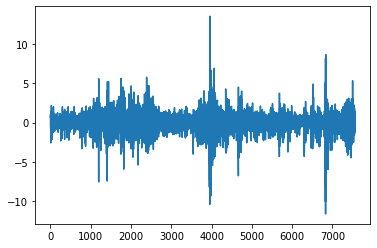

In [25]:
plt.plot(log_ret_100x)

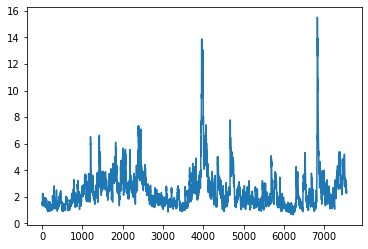

In [26]:
plt.plot(mod.asymmetric_slope(log_ret_100x, betas))